# Final Data upload 


In [1]:
%cd C:\Users\anzon\Downloads\Predictive modeling

C:\Users\anzon\Downloads\Predictive modeling


In [2]:
import pandas as pd

data = pd.read_csv('bankcustomer.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import linear_model
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [5]:
# Get the list of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
non_categorical_columns = [col for col in data.columns if col not in categorical_columns]
print("Non-categorical variable names:")
for col in non_categorical_columns:
    print(col)

Non-categorical variable names:
customer_id
credit_score
age
tenure
balance
products_number
credit_card
active_member
estimated_salary
churn


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
#data cleaning 
data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
missing_values = data.isnull().sum()

# Find columns with no missing values
columns_with_no_missing_values = missing_values[missing_values == 0].index

# Print the names of columns with no missing values
print("Variables with NO missing values:")
for col in columns_with_no_missing_values:
    print(col)

Variables with NO missing values:
customer_id
credit_score
country
gender
age
tenure
balance
products_number
credit_card
active_member
estimated_salary
churn


# Data transformation 

In [10]:
# we can acknowlege variables like country,gender, as categoricals and balance and estimated salary as floats,
# we will modifing our data to fits the following measure of classification.

In [10]:
data.country.unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
data['balance']= data['balance'].astype(int)

In [12]:
data['estimated_salary']= data['estimated_salary'].astype(int)

In [13]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0,1,1,1,101348,1
1,15647311,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,15619304,502,France,Female,42,8,159660,3,1,0,113931,1
3,15701354,699,France,Female,39,1,0,2,0,0,93826,0
4,15737888,850,Spain,Female,43,2,125510,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0,2,1,0,96270,0
9996,15569892,516,France,Male,35,10,57369,1,1,1,101699,0
9997,15584532,709,France,Female,36,7,0,1,0,1,42085,1
9998,15682355,772,Germany,Male,42,3,75075,2,1,0,92888,1


C:\Users\anzon\AppData\Local\Temp\ipykernel_7820\2980632529.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


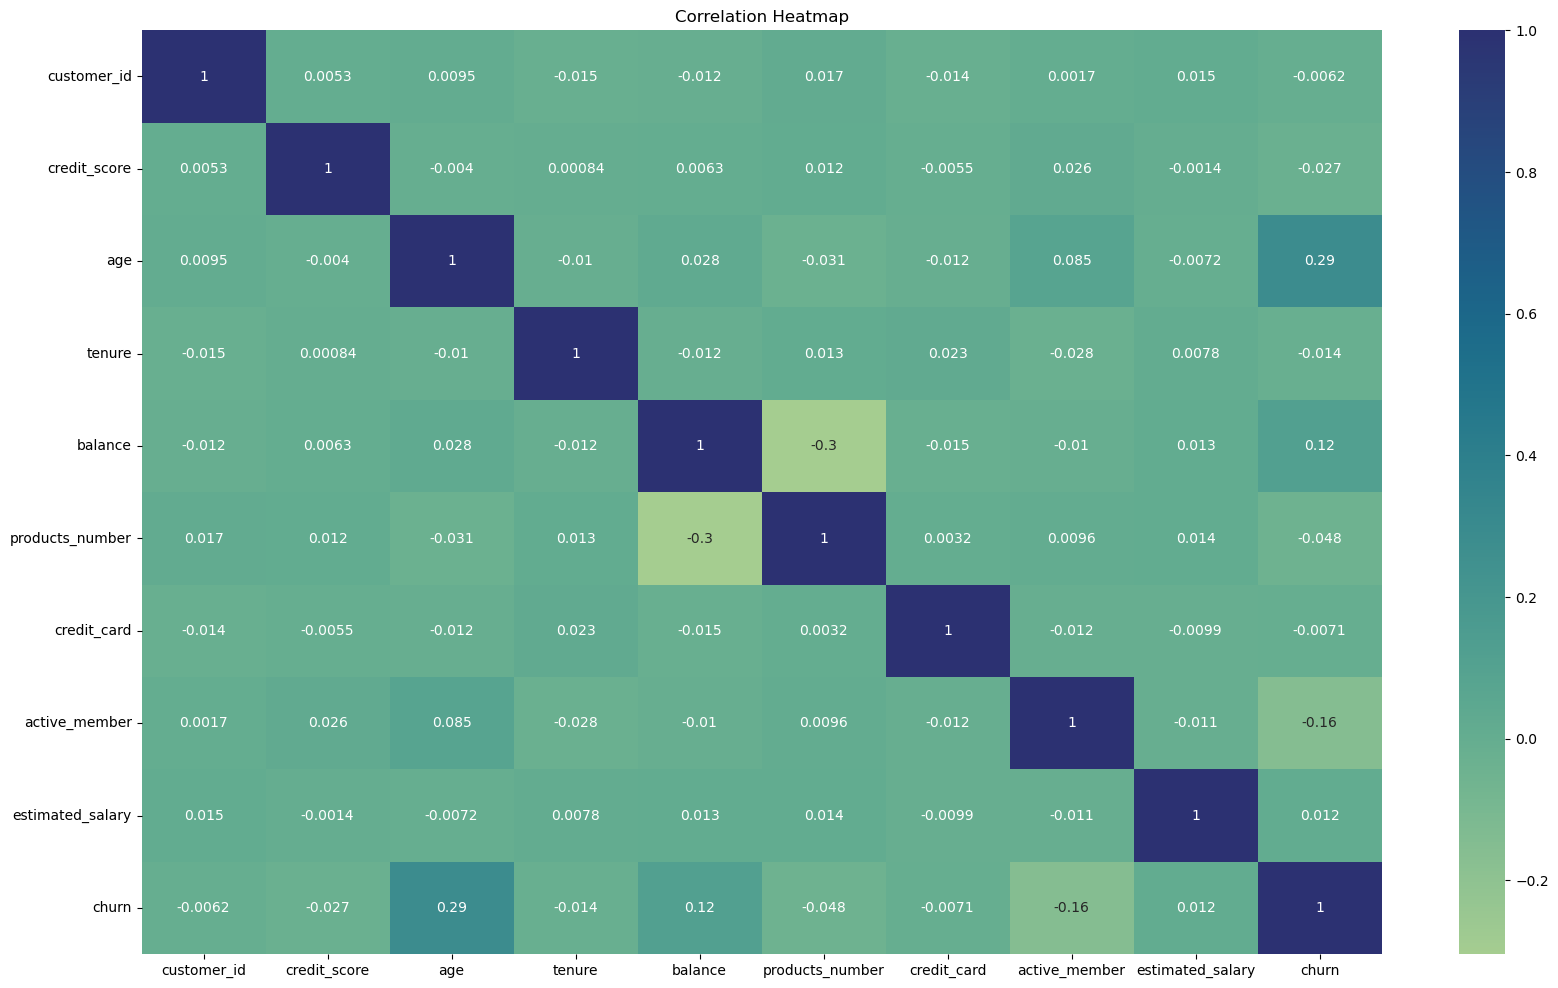

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Looking at the correlation on numerical variables.
correlation_matrix = data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

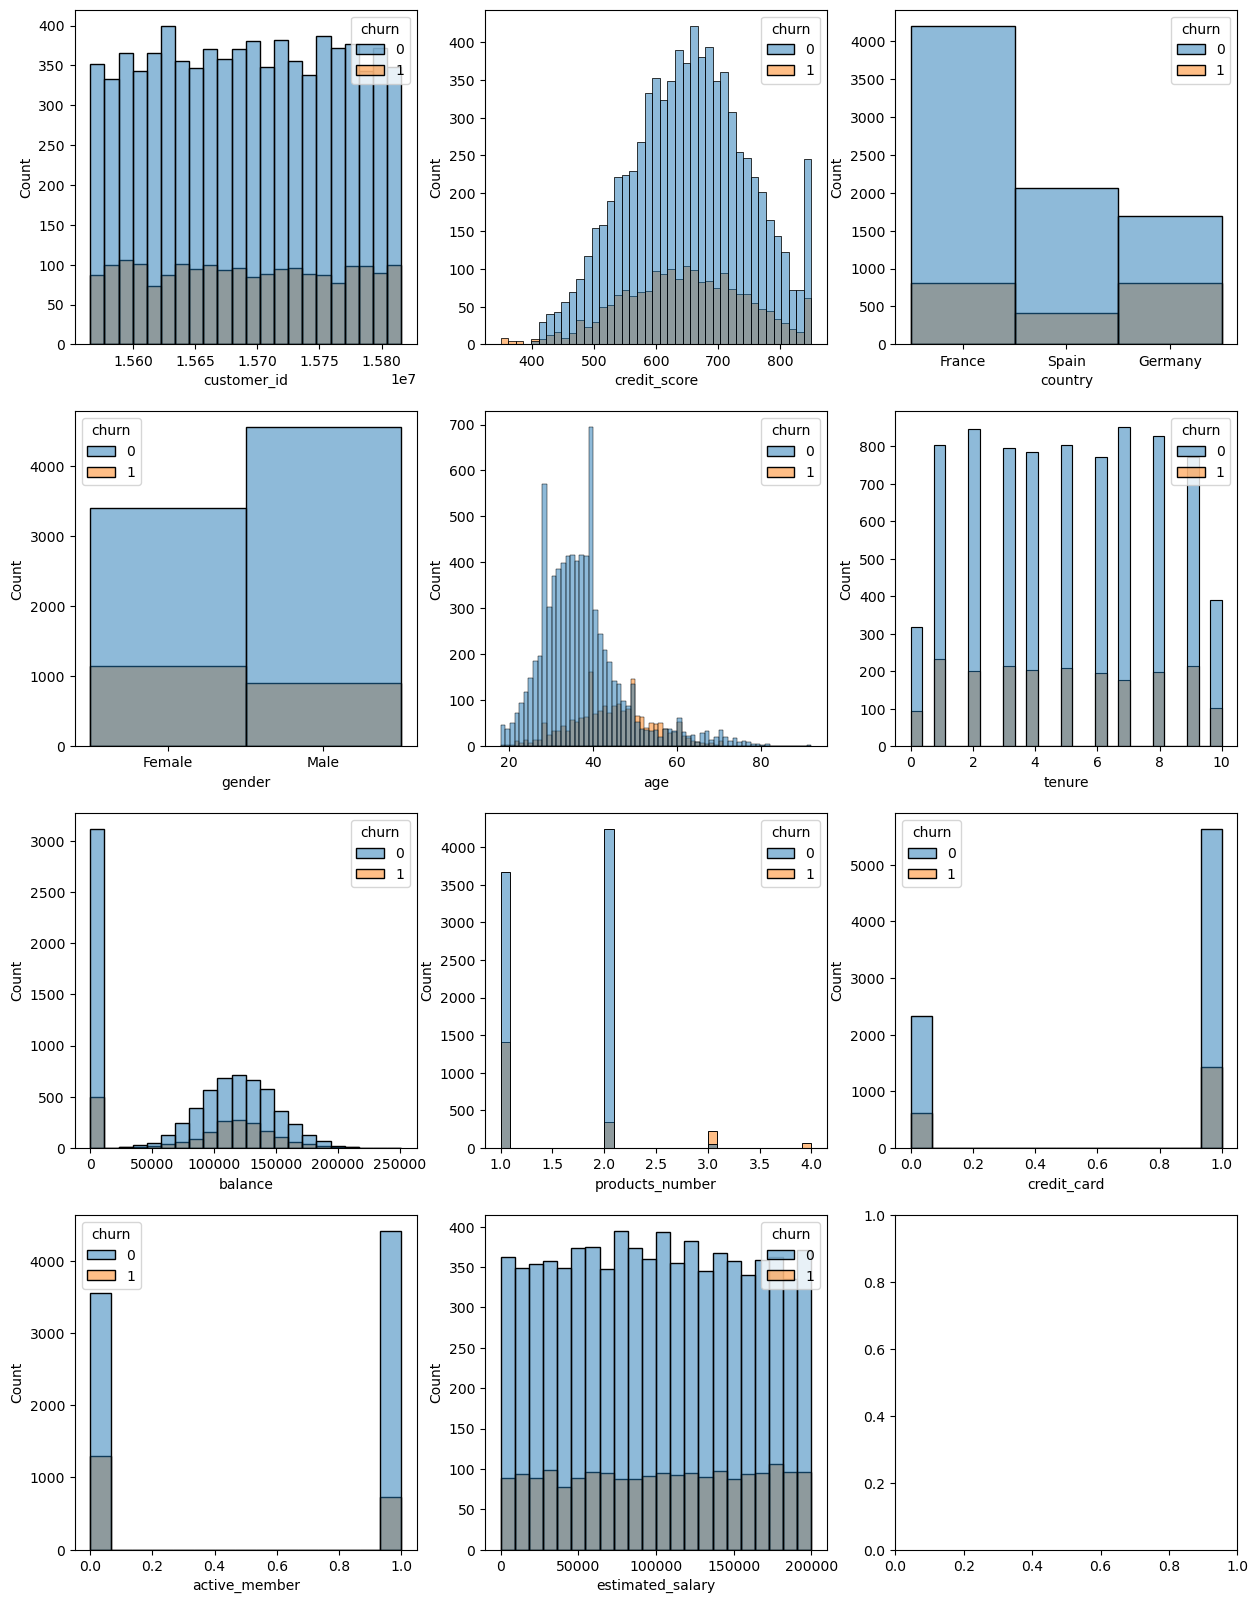

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(data.columns)-1):
    sns.histplot(data=data, x=data.columns[i],hue="churn",ax=axs[i])

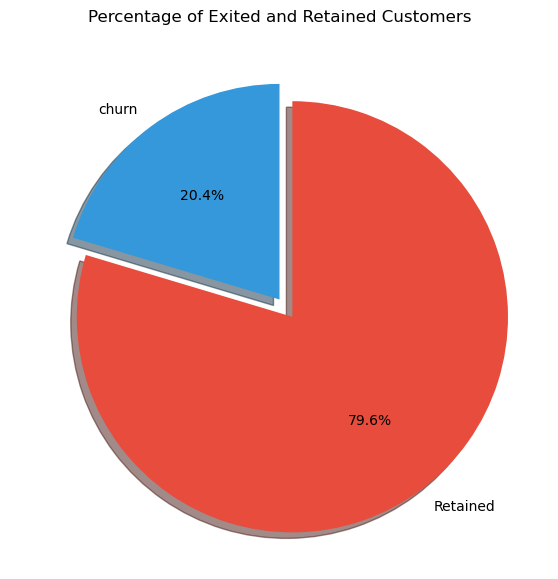

In [15]:
palette= ["#3498db", "#e74c3c"]
labels = 'churn', 'Retained'
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
explode = (0, 0.1)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', shadow=True, startangle=90, colors=palette)
plt.title("Percentage of Exited and Retained Customers", fontsize=12, color='black')
plt.show()

In [98]:
# Split Data: Split the dataset into features (X) and the target variable (churn) (y). 
# The 'Exited' column is the target variable, and the remaining columns are the features.
y = data['churn']
X = data.drop(columns=['churn'])

In [99]:
# Build lists of string variable indices and numeric variable indices
str_var_inds = []  # String variables
num_var_inds = []  # Numeric variables
k = 0
for i in X.columns:
    if data.dtypes[i] == 'object':
        str_var_inds.append(k)
    else:
        num_var_inds.append(k)
    k += 1

In [100]:
# Train-Test Split: Split the data into training and testing sets 
   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:

imp = SimpleImputer(strategy='most_frequent', add_indicator=True)

ohe = make_column_transformer(
    (OneHotEncoder(sparse_output=False), str_var_inds),
    remainder='passthrough'
)

# Baseline model 

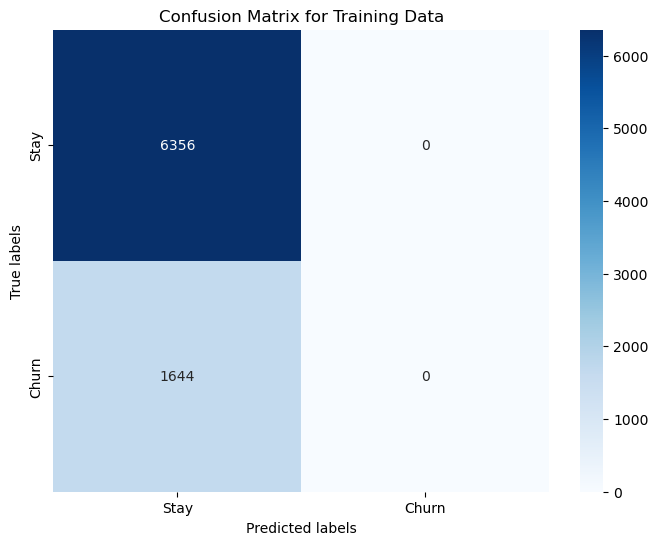

In [108]:
# Prepare the features and target variable
# One-hot encoding for categorical variables if necessary

X = data.drop(columns=['churn', 'customer_id'])  # Assuming 'customer_id' is not a feature
y = data['churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = dummy_clf.predict(X_train)

# Generate the confusion matrix for the training data
cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Training Data')
plt.show()

In [103]:
# Generate and print the classification report for the training data
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      6356
           1       0.00      0.00      0.00      1644

    accuracy                           0.79      8000
   macro avg       0.40      0.50      0.44      8000
weighted avg       0.63      0.79      0.70      8000



C:\Users\anzon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anzon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anzon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
y_pred = dummy.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Dummy Classifier Accuracy with all features: {accuracy : .4f}")

Dummy Classifier Accuracy with all features:  0.7975


# Model testing traning data selection 

In [121]:
# Using K-NN classifier 
classifiers = {
    'K-NN': KNeighborsClassifier(),
}

param_grids = {
    'K-NN': {
        'classifier__n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 32, 64],
    }
}

# Model Evaluation: creating a pipeline that includes data preprocessing steps and the classifier itself. 
# Perform grid search and cross-validation to find the best hyperparameters for  model.
results = {}

for classifier_name, classifier in classifiers.items():
    pipe = Pipeline([
        ("imputer", imp),
        ("encoder", ohe),
        ("scaler", StandardScaler()),
        ("classifier", classifier)
    ])

    param_grid = param_grids[classifier_name]

    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=5, scoring='accuracy')
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    best_score = grid.best_score_
    best_params = grid.best_params_

    # Calculate cross-validation accuracy using the best model
    cross_val_accuracy = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

    results[classifier_name] = {
        'Best cross-validation accuracy': best_score,
        'Best parameters': best_params,
        'Cross-validation accuracy': cross_val_accuracy,
        'Model fit time (minutes)': (end_time - start_time) / 60
    }

# Print Results: Print the results for each classifier, including cross-validation accuracy, best parameters,
# and the time taken for model fitting.
for classifier_name, result in results.items():
    print(f"{classifier_name} Results:")
    print(f"Best cross-validation accuracy: {result['Best cross-validation accuracy']:.2f}")
    print(f"Best parameters: {result['Best parameters']}")
    print(f"Cross-validation accuracy: {result['Cross-validation accuracy']}")
    print(f"Model fit time: {result['Model fit time (minutes)']:.2f} minutes")
    print("\n")

K-NN Results:
Best cross-validation accuracy: 0.83
Best parameters: {'classifier__n_neighbors': 7}
Cross-validation accuracy: [0.825625 0.823125 0.821875 0.830625 0.826875]
Model fit time: 0.10 minutes




In [22]:
# Using Random Forest and Decision Tree classifier.
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

param_grids = {
    'Random Forest': {
    'classifier__n_estimators': [10, 50, 80, 100],
    'classifier__max_depth': [3, 5, 7, 9, 11, 12, 13, 14, 15, 20, 25]
},
    'Decision Tree': {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 6, 7, 8, 9, 11, 13, 15, 20, 25, 30, 40, 50, 60, 75, 85, 93, 100]
}
}


results = {}

for classifier_name, classifier in classifiers.items():
    pipe = Pipeline([
        ("imputer", imp),
        ("encoder", ohe),
        ("scaler", StandardScaler()),
        ("classifier", classifier)
    ])

    param_grid = param_grids[classifier_name]

    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=5, scoring='accuracy')
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    best_score = grid.best_score_
    best_params = grid.best_params_

    
    cross_val_accuracy = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

    results[classifier_name] = {
        'Best cross-validation accuracy': best_score,
        'Best parameters': best_params,
        'Cross-validation accuracy': cross_val_accuracy,
        'Model fit time (minutes)': (end_time - start_time) / 60
    }


for classifier_name, result in results.items():
    print(f"{classifier_name} Results:")
    print(f"Best cross-validation accuracy: {result['Best cross-validation accuracy']:.2f}")
    print(f"Best parameters: {result['Best parameters']}")
    print(f"Cross-validation accuracy: {result['Cross-validation accuracy']}")
    print(f"Model fit time: {result['Model fit time (minutes)']:.2f} minutes")
    print("\n")

Random Forest Results:
Best cross-validation accuracy: 0.86
Best parameters: {'classifier__max_depth': 13, 'classifier__n_estimators': 80}
Cross-validation accuracy: [0.861875 0.865625 0.854375 0.85375  0.856875]
Model fit time: 0.66 minutes


Decision Tree Results:
Best cross-validation accuracy: 0.86
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 6}
Cross-validation accuracy: [0.85625  0.865    0.850625 0.8625   0.85625 ]
Model fit time: 0.08 minutes




In [ ]:
# Using MLP-Neural Networks and Gradient Boosting classifier.
classifiers = {
    'Neural Network': MLPClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

param_grids = {
    'Neural Network': {
        'classifier__hidden_layer_sizes': [(12, 6), (20, 15), (30, 25), (45, 35)],
        'classifier__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__solver': ['adam'],
        'classifier__max_iter': [1000],
},
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100, 200, 250],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 50, 100]
    }
}

results = {}

for classifier_name, classifier in classifiers.items():
    pipe = Pipeline([
        ("imputer", imp),
        ("encoder", ohe),
        ("scaler", StandardScaler()),
        ("classifier", classifier)
    ])

    param_grid = param_grids[classifier_name]

    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=5, scoring='accuracy')
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    best_score = grid.best_score_
    best_params = grid.best_params_

    
    cross_val_accuracy = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

    results[classifier_name] = {
        'Best cross-validation accuracy': best_score,
        'Best parameters': best_params,
        'Cross-validation accuracy': cross_val_accuracy,
        'Model fit time (minutes)': (end_time - start_time) / 60
    }


for classifier_name, result in results.items():
    print(f"{classifier_name} Results:")
    print(f"Best cross-validation accuracy: {result['Best cross-validation accuracy']:.2f}")
    print(f"Best parameters: {result['Best parameters']}")
    print(f"Cross-validation accuracy: {result['Cross-validation accuracy']}")
    print(f"Model fit time: {result['Model fit time (minutes)']:.2f} minutes")
    print("\n")

In [23]:
# Random forest  classifier showed the best overall cross-validation accuracy on the training set. Now, lets dive in depth 
# into the parameters of the model. From the previous model: Best parameters: Best parameters: {'classifier__max_depth': 13,
#classifier__n_estimators: 60}

classifiers = {
    'Random Forest': RandomForestClassifier(),
}

param_grids = {
    'Random Forest': {
    'classifier__n_estimators': [10, 60, 120, 180],
    'classifier__max_depth': [13,16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
},
    }
    

results = {}

for classifier_name, classifier in classifiers.items():
    pipe = Pipeline([
        ("imputer", imp),
        ("encoder", ohe),
        ("scaler", StandardScaler()),
        ("classifier", classifier)
    ])

    param_grid = param_grids[classifier_name]

    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=5, scoring='accuracy')
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    best_score = grid.best_score_
    best_params = grid.best_params_

    
    cross_val_accuracy = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

    results[classifier_name] = {
        'Best cross-validation accuracy': best_score,
        'Best parameters': best_params,
        'Cross-validation accuracy': cross_val_accuracy,
        'Model fit time (minutes)': (end_time - start_time) / 60
    }


for classifier_name, result in results.items():
    print(f"{classifier_name} Results:")
    print(f"Best cross-validation accuracy: {result['Best cross-validation accuracy']:.2f}")
    print(f"Best parameters: {result['Best parameters']}")
    print(f"Cross-validation accuracy: {result['Cross-validation accuracy']}")
    print(f"Model fit time: {result['Model fit time (minutes)']:.2f} minutes")
    print("\n")

Random Forest Results:
Best cross-validation accuracy: 0.86
Best parameters: {'classifier__max_depth': 16, 'classifier__n_estimators': 180}
Cross-validation accuracy: [0.859375 0.868125 0.854375 0.85625  0.86875 ]
Model fit time: 1.03 minutes




In [24]:
# Random forest  classifier showed the best overall cross-validation accuracy on the training set. Now, lets dive in depth 
# into the parameters of the model. From the previous model: Best parameters: Best parameters:
#{'classifier__max_depth': 16, 'classifier__n_estimators': 60}

classifiers = {
    'Random Forest': RandomForestClassifier(),
}

param_grids = {
    'Random Forest': {
    'classifier__n_estimators': [20, 40, 50, 60],
    'classifier__max_depth': [2,3, 4, 6, 7, 8, 10, 11, 12, 13, 16]
},
    }
    
# Model Evaluation: creating a pipeline that includes data preprocessing steps and the classifier itself. 
# Perform grid search and cross-validation to find the best hyperparameters for  model.
results = {}

for classifier_name, classifier in classifiers.items():
    pipe = Pipeline([
        ("imputer", imp),
        ("encoder", ohe),
        ("scaler", StandardScaler()),
        ("classifier", classifier)
    ])

    param_grid = param_grids[classifier_name]

    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=5, scoring='accuracy')
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    best_score = grid.best_score_
    best_params = grid.best_params_

    # Calculate cross-validation accuracy using the best model
    cross_val_accuracy = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

    results[classifier_name] = {
        'Best cross-validation accuracy': best_score,
        'Best parameters': best_params,
        'Cross-validation accuracy': cross_val_accuracy,
        'Model fit time (minutes)': (end_time - start_time) / 60
    }

# Print Results: Print the results for each classifier, including cross-validation accuracy, best parameters,
# and the time taken for model fitting.
for classifier_name, result in results.items():
    print(f"{classifier_name} Results:")
    print(f"Best cross-validation accuracy: {result['Best cross-validation accuracy']:.2f}")
    print(f"Best parameters: {result['Best parameters']}")
    print(f"Cross-validation accuracy: {result['Cross-validation accuracy']}")
    print(f"Model fit time: {result['Model fit time (minutes)']:.2f} minutes")
    print("\n")

Random Forest Results:
Best cross-validation accuracy: 0.86
Best parameters: {'classifier__max_depth': 12, 'classifier__n_estimators': 60}
Cross-validation accuracy: [0.863125 0.8675   0.854375 0.85875  0.86125 ]
Model fit time: 0.35 minutes




In [25]:
# Assuming you've already trained your best model and have it in the 'grid.best_estimator_'
best_model = grid.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_train)

# Generate a classification report
report = classification_report(y_train, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6368
           1       0.98      0.66      0.79      1632

    accuracy                           0.93      8000
   macro avg       0.95      0.83      0.87      8000
weighted avg       0.93      0.93      0.92      8000



# Best Testing Model 

In [33]:
best_classifier = classifiers[sorted(results, key=lambda x: results[x]['Best cross-validation accuracy'], reverse=True)[0]]

best_pipe = Pipeline([
    ("imputer", imp),
    ("encoder", ohe),
    ("scaler", StandardScaler()),
    ("classifier", best_classifier)
])

best_pipe.fit(X_train, y_train)
test_accuracy = best_pipe.score(X_test, y_test)
print(f"Best model test accuracy: {test_accuracy:.2f}")

Best model test accuracy: 0.87


In [34]:
# Assuming you've already trained your best model and have it in the 'grid.best_estimator_'
best_model = grid.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1538   57]
 [ 207  198]]


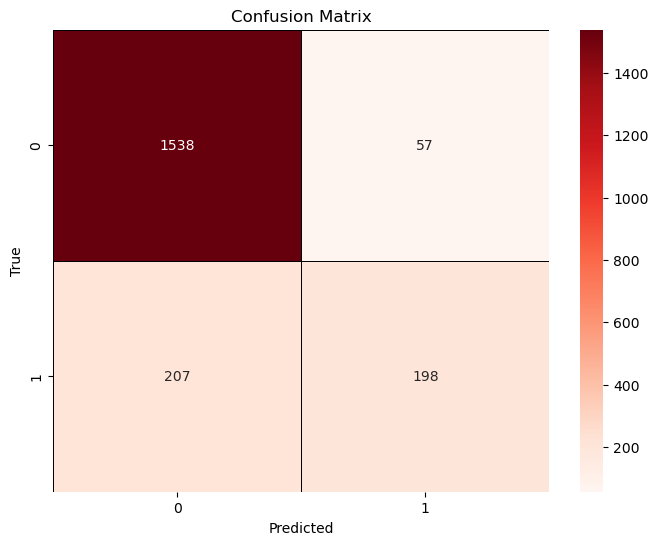

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", linewidths=0.5, linecolor="black")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#Best mode
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.78      0.49      0.60       405

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



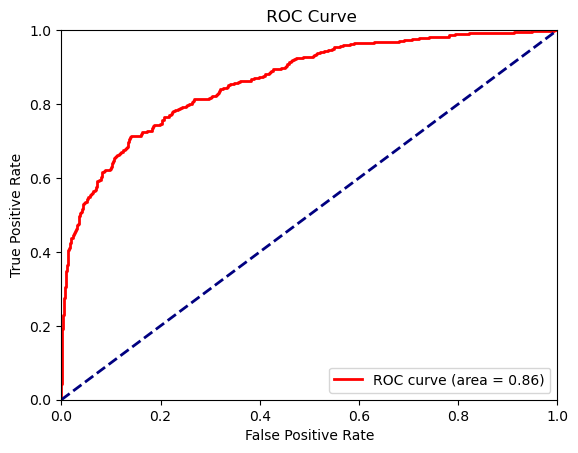

In [37]:
#Best model 

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc="lower right")
plt.show()

# feature importance model 

In [53]:

best_model = grid.best_estimator_


if isinstance(best_model.named_steps['classifier'], RandomForestClassifier):
    # Get the feature importances
    feature_importances = best_model.named_steps['classifier'].feature_importances_

    # Create a list of feature names (assuming they are in the same order as in your data)
    feature_names = X_train.columns  # Replace with your actual feature names

    
    feature_importance_dict = dict(zip(feature_names, feature_importances))

    
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Print or access the sorted feature importances
    for feature, importance in sorted_feature_importance:
        print(f"Feature: {feature}, Importance: {importance:.4f}")
else:
    print("The best model is not a Random Forest  Classifier. Feature importances are only available for tree-based models.")


Feature: active_member, Importance: 0.2575
Feature: country_Spain, Importance: 0.1700
Feature: country_Germany, Importance: 0.1090
Feature: credit_card, Importance: 0.0953
Feature: products_number, Importance: 0.0925
Feature: estimated_salary, Importance: 0.0514
Feature: credit_score, Importance: 0.0262
Feature: gender_Male, Importance: 0.0127
Feature: customer_id, Importance: 0.0125
Feature: tenure, Importance: 0.0114
Feature: age, Importance: 0.0107
Feature: balance, Importance: 0.0105


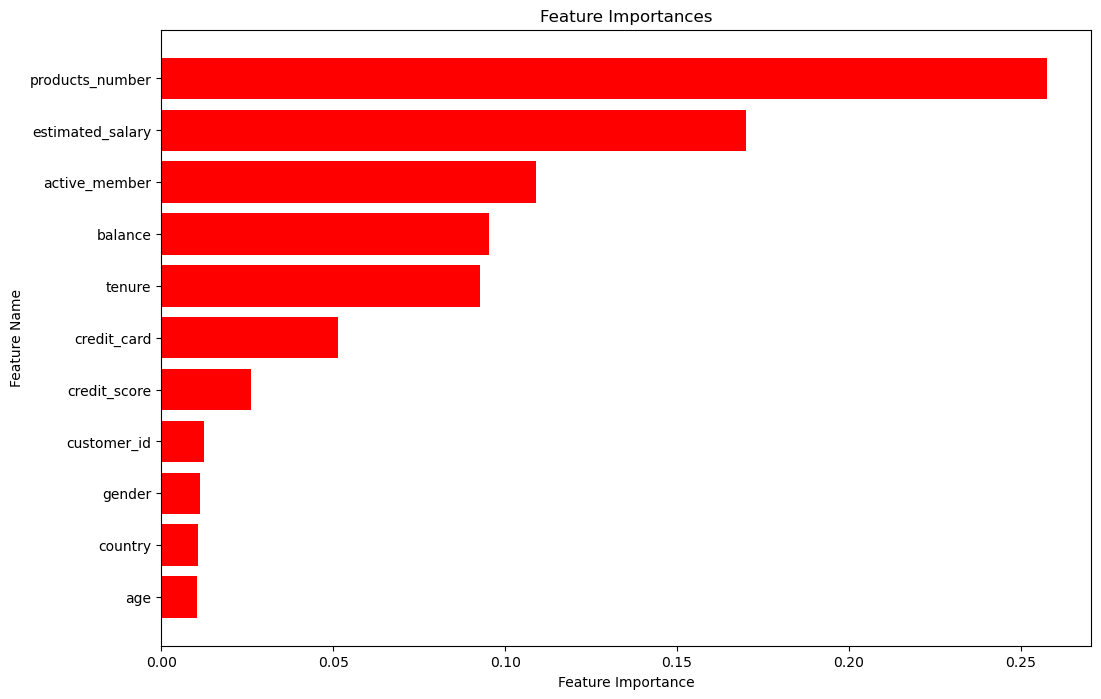

In [49]:

features, importances = zip(*sorted_feature_importance)


plt.figure(figsize=(12, 8))
plt.barh(features, importances, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()